In [1]:
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt
%matplotlib inline

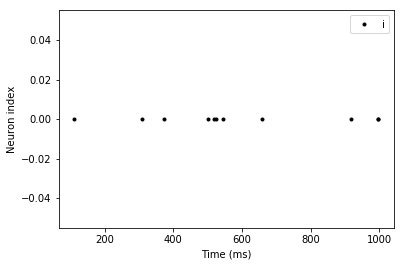

In [13]:
start_scope()

eqs = '''
dv/dt = (0.8-v)/tau : 1
'''

P = PoissonGroup(1, 8*Hz)
# G = NeuronGroup(100, eqs, threshold='v>1.05', reset='v=0', method='euler')
# G.v = 0
# S = Synapses(P, G, on_pre='v+=0.1')
# S.connect(condition='i!=j', p=0.05)

# S1 = Synapses(G, G, on_pre='v+=0.1')
# S1.connect(condition='i!=j', p=0.1)

M = SpikeMonitor(P)

run(1000*ms)

plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
legend();

In [11]:
print(M.t/ms, M.i)

[176.9 217.9 248.3 284.1 367.6 387.5 517.7 594.2 724.2 789.7 867.9 884.3
 973.3 983.3 997.2] <spikemonitor.i: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>


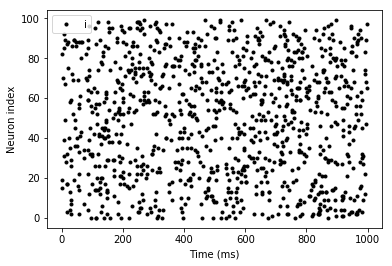

In [9]:
start_scope()

P = PoissonGroup(100, 10*Hz)
M = SpikeMonitor(P)

run(1000*ms)

plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
legend();

In [146]:
print(M.t/ms)
print(M.i)

[6.000e-01 1.000e+00 1.700e+00 2.400e+00 2.700e+00 3.300e+00 3.400e+00
 3.800e+00 5.400e+00 1.000e+01 1.030e+01 1.040e+01 1.470e+01 1.620e+01
 1.680e+01 1.950e+01 2.690e+01 2.810e+01 2.910e+01 3.090e+01 3.150e+01
 3.220e+01 3.260e+01 3.300e+01 3.340e+01 3.610e+01 3.680e+01 4.220e+01
 4.390e+01 4.790e+01 4.840e+01 4.890e+01 4.950e+01 5.390e+01 5.770e+01
 6.120e+01 6.200e+01 6.300e+01 6.570e+01 6.600e+01 7.090e+01 7.130e+01
 7.160e+01 7.210e+01 7.220e+01 7.280e+01 7.370e+01 7.400e+01 7.710e+01
 7.760e+01 7.850e+01 7.850e+01 8.070e+01 8.510e+01 8.510e+01 8.560e+01
 8.800e+01 8.910e+01 8.990e+01 9.410e+01 9.670e+01 9.770e+01 1.000e+02
 1.023e+02 1.025e+02 1.038e+02 1.101e+02 1.226e+02 1.228e+02 1.279e+02
 1.297e+02 1.323e+02 1.334e+02 1.334e+02 1.344e+02 1.368e+02 1.374e+02
 1.380e+02 1.387e+02 1.387e+02 1.388e+02 1.388e+02 1.401e+02 1.416e+02
 1.429e+02 1.442e+02 1.445e+02 1.464e+02 1.478e+02 1.514e+02 1.535e+02
 1.552e+02 1.583e+02 1.599e+02 1.613e+02 1.635e+02 1.641e+02 1.643e+02
 1.653

In [133]:
# print(M.t/ms)


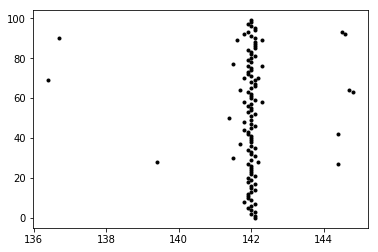

In [140]:
plot(M.t[:113]/ms, M.i[:113], '.k')

In [52]:
indices = array([0, 2, 1])
times = array([1, 2, 3])*ms
G = SpikeGeneratorGroup(3, indices, times)

G.rates

AttributeError: No attribute with name rates

AttributeError: No attribute with name v

In [41]:
indices = array([0, 2, 1])
times = array([1, 2, 3])*ms
G = SpikeGeneratorGroup(3, indices, times)

In [42]:
N=100
inp = SpikeGeneratorGroup(N, indices, times)
G = NeuronGroup(N, '...')
feedforward = Synapses(inp, G, '...', on_pre='...')
feedforward.connect(j='i')
recurrent = Synapses(G, G, '...', on_pre='...')
recurrent.connect('i!=j')
spike_mon = SpikeMonitor(G)
# ...
run(runtime)
# Replay the previous output of group G as input into the group
inp.set_spikes(spike_mon.i, spike_mon.t + runtime)
run(runtime)

EquationError: Parsing failed: 
...
^
Expected end of text (at char 0), (line:1, col:1)

In [7]:


tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
run(100*ms)

INFO       No numerical integration method specified for group 'neurongroup_3', using method 'exact' (took 0.06s). [brian2.stateupdaters.base.method_choice]


In [8]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


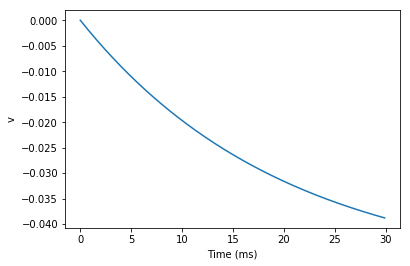

In [25]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plt.plot(M.t/ms, M.v[0])

plt.xlabel('Time (ms)')
plt.ylabel('v');

INFO       No numerical integration method specified for group 'neurongroup_5', using method 'exact' (took 0.35s). [brian2.stateupdaters.base.method_choice]


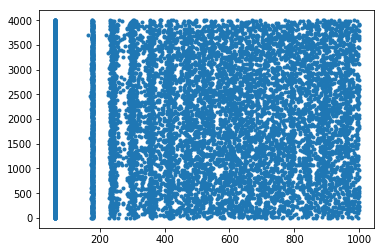

In [32]:
start_scope()

eqs = '''
dv/dt  = (ge+gi-(v+49.5*mV))/(20*ms) : volt
dge/dt = -ge/(2*ms)                : volt
dgi/dt = -gi/(15*ms)               : volt
'''


P = NeuronGroup(4000, eqs, threshold='v>-50*mV', reset='v=-60*mV')
P.v = -60*mV
Pe = P[:3200]
Pi = P[3200:]
Ce = Synapses(Pe, P, on_pre='ge+=1.62*mV')
Ce.connect(p=0.02)
Ci = Synapses(Pi, P, on_pre='gi-=9*mV')
Ci.connect(p=0.02)
M = SpikeMonitor(P)
run(1*second)
plt.plot(M.t/ms, M.i, '.')
plt.show()

In [38]:
20*volt

20. * volt

In [39]:
volt

volt